# 1. Dice rolls (*)

Create a textfile called dice_rolls.txt using Python. Also for each subtask, write adequate headers.

  a)   Simulate 20 dice rolls and write them to your textfile. (*)

  b)   Sort the dice rolls from a) and write them to a separate row in the same textfile. (*)

  c)   Count the number of fours in the dice rolls and write them to a separate row in the same textfile. (*)

In [15]:
import random as rnd

#path = '../Code-Along/8_files/'
exercpath = 'exercisefiles/'

# Create list of dice rolls
Nrolls = 20
rolls = [rnd.randint(1,6) for _ in range(Nrolls)]

# a) Save these rolls (in a row)
with open(exercpath+'dice_rolls.txt', 'w') as f1:
    for roll in rolls:
        f1.write(f"{roll},")

# b) sort dice rolls and save them on a new row
rolls.sort()
with open(exercpath+'dice_rolls.txt', 'a') as f1:
    # Add a new line
    f1.write("\n")
    # Write sorted rolls on a new line
    for roll in rolls:
        f1.write(f"{roll},")
    #
    # c) count number of fours and write on a new line
    #
    Nfours = len([roll for roll in rolls if roll == 4])
    f1.write(f"\n{Nfours}")


# 2. Test results (*)

Read in the file test_result.txt in Python.

  a)   Print out the text in the terminal (*)

  b)   Create new rows in the same file and write the people and their corresponding scores in alphabetical order. (*)

  c)   Create additional rows in the same file and sort the people after their grades. The grade limits are: (**)

F < 20

E: 20-29

D: 30-39

C: 40-49

B: 50-59

A: 60-70

In [62]:
# Save paths
path = '../Code-Along/8_files/'
exercpath = 'exercisefiles/'

scores = []

# a) load testreults and print, and make a new copy that I work with
with open(path+'test_result.txt', 'r') as f1, open(exercpath+'test_result.txt', 'w') as f2:
    #print(repr(f1.readlines()))
    # Append scores and names in a list and remove \n
    # And copy original file to a work-file
    for score in f1.readlines():
        scores.append(score.strip("\n"))
        f2.write(f"{score}")
# b) Sort scores in alphabetic order and append
scores.sort()
with open(exercpath+'test_result.txt', 'a') as f1:
    f1.write("\n\nb) Sorted alphabetically:\n")
    for score in scores:
        f1.write(f"{score}\n")
    #
    # c) sort in order of score and add in file
    #
    gradeslimits = [ 20, 30, 40, 50, 60, 70]
    grades       = ["F","E","D","C","B","A"]
    f1.write("\nc) Sorted by grades:\n")
    for nn in range(len(gradeslimits)):
        f1.write("\n")
        # With this solution I need to loop all for every loop...
        for ii,score in enumerate(scores):
            # First line for each loop states the grade
            if ii == 0:
                f1.write(f"Grade: {grades[nn]}\n")
            # Then extract points and check the grade
            points = int(score.split()[-1])
            if nn == 0:
                if points < gradeslimits[nn]:
                    f1.write(f"{score}\n")
            else:
                if points < gradeslimits[nn] and points >= gradeslimits[nn-1]:
                    f1.write(f"{score}\n")


# 3. National test (*)

Read in the file NPvt19Ma2A.txt and NPvt19Ma2C.txt in Python. Use matplotlib to plot pie charts for each grade categories in each file. (*)

([<matplotlib.patches.Wedge at 0x7f741b131610>,
 [Text(1.0619197970214505, 0.28692567799679736, 'A'),
  Text(0.6182916662326186, 0.9097886652774326, 'B'),
  Text(-0.7038257477845727, 0.8453575082504958, 'C'),
  Text(-0.9705201984102415, -0.5177746077954632, 'D'),
  Text(0.12070819056968034, -1.0933570015001477, 'E'),
  Text(1.0149402295675634, -0.4241418753263367, 'F')])

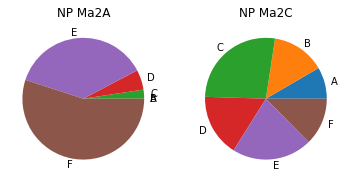

In [84]:
import os
import matplotlib.pyplot as plt

# Save paths
path = '../Code-Along/8_files/'
exercpath = 'exercisefiles/'
filename1 = 'NPvt19Ma2A.txt'
filename2 = 'NPvt19Ma2C.txt'
class1    = "NP Ma2A"
class2    = "NP Ma2C"


# Copy original files to work directory (only works with Bash though :) )
os.system(f'cp {path}{filename1} {exercpath}')
os.system(f'cp {path}{filename2} {exercpath}')

# Lists with input data to plot
data1grade,data1point = [],[]
data2grade,data2point = [],[]

with open(exercpath+filename1, 'r') as f1, open(exercpath+filename2, 'r') as f2:
    # Extract grades and points
    for data in f1.readlines():
        data1grade.append(data.split()[0])
        data1point.append(float(data.strip("%\n").split()[1]))
    for data in f2.readlines():
        data2grade.append(data.split()[0])
        data2point.append(float(data.split()[1].replace(" ", "").strip("%\n")))
#
# Plot everything
#
plt.figure(facecolor='white')
plt.subplot(1,2,1)
plt.title(class1)
plt.pie(data1point,labels=data1grade)
plt.subplot(1,2,2)
plt.title(class2)
plt.pie(data2point,labels=data2grade)


# 4. Dice roll experiment (**)

Simulate 10, 100, 1000, 10000, 100000 dice rolls and count the freqencies and probabilities for each number in each simulation. Create a new text file using Python with the name "simulation.txt" and write the results to that text file.(**)

see [simulations.txt]() for my results

In [113]:
import random as rnd
#
# File paths and file names
#
exercpath = 'exercisefiles/'
outfile   = 'simulations.txt'
#
# List of number of rolls
nrolls        = [10**n for n in range(1,6)]
# List of possible results
diceresults   = list(range(1,7))
textresults   = ["Ones","Twos","Threes","Fours","Fives","Sixes"]
# List with counters (for frequencies)
frequencies   = [[0 for _ in range(6)] for _ in range(len(nrolls))]
# Index here are: [n][:] gives all freq for nrolls[n] number of rolls.
#
with open(exercpath+outfile, 'w') as f:
    for ii,nroll in enumerate(nrolls):
        for _ in range(nroll):
            #
            # Roll the dice, many times
            #
            result = rnd.randint(1,6)
            #
            # Check the results and save the number of times it gets each result
            # for each number of rolls
            #
            for nn in range(6):
                if result == diceresults[nn]:
                    frequencies[ii][nn] += 1
        #
        # Save frequencies and probabilities neatly in a text file
        # 
        f.write(f"Number of rolls: {nroll}\n")
        for nn,text in enumerate(textresults):
            # Compute probability
            probability = frequencies[ii][nn] / nroll
            # Write to file
            f.write(f"{text}: {frequencies[ii][nn]}, probability: {probability}\n")
            # Add an empty line in the end of each list of rolls
            if nn == 5:
                f.write("\n")
#
# 
#

Number of rolls: 10

Ones: 3, probability: 0.3

Twos: 4, probability: 0.4

Threes: 0, probability: 0.0

Fours: 1, probability: 0.1

Fives: 2, probability: 0.2

Sixes: 0, probability: 0.0



Number of rolls: 100

Ones: 22, probability: 0.22

Twos: 13, probability: 0.13

Threes: 11, probability: 0.11

Fours: 16, probability: 0.16

Fives: 18, probability: 0.18

Sixes: 20, probability: 0.2



Number of rolls: 1000

Ones: 172, probability: 0.172

Twos: 165, probability: 0.165

Threes: 195, probability: 0.195

Fours: 146, probability: 0.146

Fives: 154, probability: 0.154

Sixes: 168, probability: 0.168



Number of rolls: 10000

Ones: 1684, probability: 0.1684

Twos: 1654, probability: 0.1654

Threes: 1618, probability: 0.1618

Fours: 1669, probability: 0.1669

Fives: 1671, probability: 0.1671

Sixes: 1704, probability: 0.1704



Number of rolls: 100000

Ones: 16541, probability: 0.16541

Twos: 16783, probability: 0.16783

Threes: 16667, probability: 0.16667

Fours: 16889, probability: 0.16